In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv('Pred_result.csv', sep=',', delimiter=None)
df['center_x'] = (df['xmax'] + df['xmin']) / 2
df['center_y'] = (df['ymax'] + df['ymin']) / 2
df

,xmin,ymin,xmax,ymax,confidence,class,name,center_x,center_y
0,710.334045,418.143616,725.353333,431.740479,0.516291,0,ball,717.843689,424.942048
1,710.434143,419.193451,730.669495,437.913605,0.663287,0,ball,720.551819,428.553528
2,711.796509,419.313049,732.544067,438.706055,0.601801,0,ball,722.170288,429.009552
3,713.487732,421.856720,735.621399,442.312347,0.643319,0,ball,724.554566,432.084534
4,713.260681,425.394318,737.392029,445.788666,0.766230,0,ball,725.326355,435.591492
...,...,...,...,...,...,...,...,...,...
95,1011.691223,422.776245,1035.038330,443.930908,0.772324,0,ball,1023.364777,433.353577
96,1017.491882,425.914093,1041.792236,446.584808,0.749853,0,ball,1029.642059,436.249450
97,1027.654053,432.556488,1049.521729,452.262054,0.676887,0,ball,1038.587891,442.409271
98,1033.934082,437.244690,1059.465576,460.291321,0.715137,0,ball,1046.699829,448.768005


In [4]:
df2 = pd.read_csv('GroundTruth.csv', sep=',', delimiter=None)
df2['center_x'] = df2['bbox_x'] + df2['bbox_width'] / 2
df2['center_y'] = df2['bbox_y'] + df2['bbox_height'] / 2
df2

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height,center_x,center_y
0,ball,710,418,15,14,left002001.png,1280,720,717.5,425.0
1,ball,715,419,16,15,left002002.png,1280,720,723.0,426.5
2,ball,716,422,15,14,left002003.png,1280,720,723.5,429.0
3,ball,717,423,15,15,left002004.png,1280,720,724.5,430.5
4,ball,720,428,15,14,left002005.png,1280,720,727.5,435.0
...,...,...,...,...,...,...,...,...,...,...
95,ball,1015,428,16,13,left002096.png,1280,720,1023.0,434.5
96,ball,1026,430,16,15,left002097.png,1280,720,1034.0,437.5
97,ball,1033,435,17,17,left002098.png,1280,720,1041.5,443.5
98,ball,1043,441,16,14,left002099.png,1280,720,1051.0,448.0


In [5]:
x1 = df2['center_x']
y1 = df2['center_y']
x2 = df['center_x']
y2 = df['center_y']

In [22]:
xval = abs(df['xmin'] - df2['bbox_x'])
yval = abs(df['ymin'] - df2['bbox_y'])

In [23]:
xval

0     0.334045
1     4.565857
2     4.203491
3     3.512268
4     6.739319
        ...   
95    3.308777
96    8.508118
97    5.345947
98    9.065918
99    4.415283
Length: 100, dtype: float64

In [24]:
yval

0     0.143616
1     0.193451
2     2.686951
3     1.143280
4     2.605682
        ...   
95    5.223755
96    4.085907
97    2.443512
98    3.755310
99    5.022797
Length: 100, dtype: float64

In [25]:
# err = sqrt((xval[2])**2 - (yval[2])**2)
v = []
for i in range(0,100):
    e = math.sqrt(abs((xval[i])**2 - (yval[i])**2))
    v.append(e)

In [26]:
f = pd.DataFrame(v)
f

,0
0,0.301597
1,4.561757
2,3.232589
3,3.320984
4,6.215211
...,...
95,4.042228
96,7.462803
97,4.754829
98,8.251577


In [27]:
ade = (np.sum(v))/100
ade

2.6053745322768225

In [28]:
for a in range(len(x2)):
    y = x2[a]
    z = y2[a]
    c = x1[a]
    d = y1[a]
    a += 1

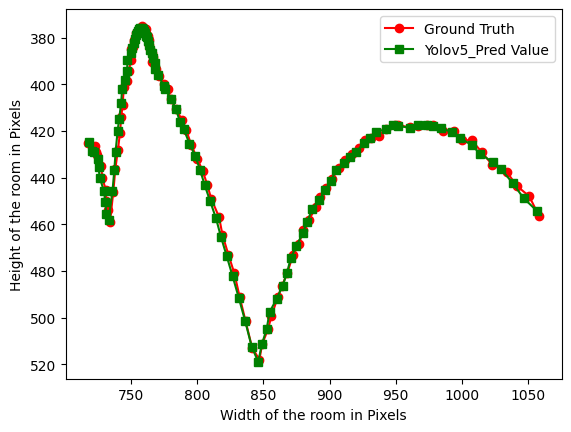

In [29]:
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x2, y2, marker='s', color='green', label='Yolov5_Pred Value')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [30]:
def Displacement_Error(x1, y1, x2, y2):
    dis_err = sqrt((x2-x1)**2 + (y2-y1)**2)
    return dis_err 

In [31]:
count = 0
for i in range(len(x1)):
    predicted_coordinates = list(zip(x2,y2))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [32]:
# predicted_coordinates

In [33]:
f_x2 = f_x2(i for i in df['xmin'])
g_y2 = [i for i in df['ymin']]
h_x1 = [i for i in df2['bbox_x']]
j_y1 = [i for i in df2['bbox_y']]

NameError: name 'f_x2' is not defined

In [ ]:
y = [z for z in x2]
print(y[1])
    # d = df.iloc[0]
    # print(d)

710.434143


In [ ]:
predicted_coordinates[0][0]

710.334045

In [ ]:
ground_coordinates[0][0]

710

In [34]:
def avg_displacement_error(predicted, ground_truth):
  error = 0
  for i in range(len(predicted)):
    error += ((predicted[i][0] - ground_truth[i][0]) ** 2 + (predicted[i][1] - ground_truth[i][1]) ** 2) ** 0.5
  return error / len(predicted)

# predicted_coordinates = [[1, 2], [3, 4], [5, 6], [7, 8]]
# ground_truth_coordinates = [[2, 3], [4, 5], [6, 7], [8, 9]]


In [35]:
#Average Mahalanobis Distance (AMD)
from scipy.spatial.distance import mahalanobis
def avg_mahalanobis_distance(predicted, ground_truth):
    
    predicted = np.array(predicted)
    ground_truth = np.array(ground_truth)
    mean_predicted = np.mean(predicted, axis=0)
    mean_ground_truth = np.mean(ground_truth, axis=0)
    cov_predicted = np.cov(predicted.T)
    cov_ground_truth = np.cov(ground_truth.T)
    inv_cov_predicted = np.linalg.inv(cov_predicted)
    inv_cov_ground_truth = np.linalg.inv(cov_ground_truth)
    error = 0
    for i in range(len(predicted)):
        error += mahalanobis(predicted[i], ground_truth[i], inv_cov_predicted + inv_cov_ground_truth)
    return error / len(predicted)


In [36]:
error = avg_mahalanobis_distance(predicted_coordinates, ground_coordinates)
print(error)


0.03569533848243663


In [37]:
import numpy as np

def final_displacement_error(desired_path, actual_path):
    # Extract the final position from each path
    final_desired = desired_path[-1, :]
    final_actual = actual_path[-1, :]
    # Calculate the error as the difference between the two positions
    error = final_desired - final_actual
    return error


New Yolov5 based detection result. Trained using 2165 frames.

In [38]:
df_new = pd.read_csv('NewYolov5.csv', sep=',', delimiter=None)
df_new

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height,center_x,center_y
0,ball,712,417,12,13,left002001.png,1280,720,718.0,423.5
1,ball,710,418,19,19,left002002.png,1280,720,719.5,427.5
2,ball,716,424,15,16,left002004.png,1280,720,723.5,432.0
3,ball,718,428,15,16,left002005.png,1280,720,725.5,436.0
4,ball,718,431,17,17,left002006.png,1280,720,726.5,439.5
...,...,...,...,...,...,...,...,...,...,...
91,ball,1009,422,12,13,left002095.png,1280,720,1015.0,428.5
92,ball,1016,425,14,15,left002096.png,1280,720,1023.0,432.5
93,ball,1024,430,14,14,left002097.png,1280,720,1031.0,437.0
94,ball,1034,437,12,13,left002098.png,1280,720,1040.0,443.5


In [39]:
x1 = df2['bbox_x']
y1 = df2['bbox_y']
x2 = df_new['bbox_x']
y2 = df_new['bbox_y']

In [40]:
count = 0
for i in range(len(x1)):
    predicted_coordinates = list(zip(x2,y2))
    ground_coordinates = list(zip(x1,y1))
    count += 1

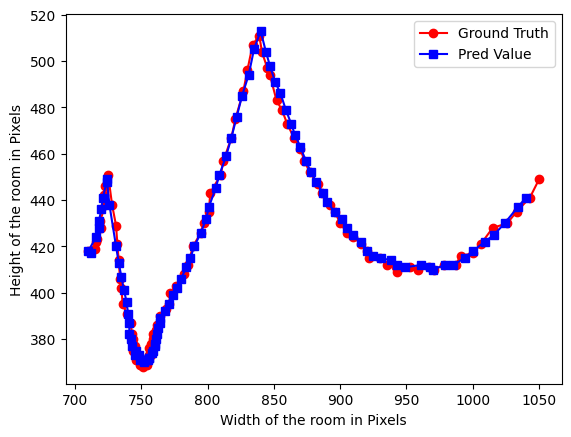

In [41]:
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x2, y2, marker='s', color='blue', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [ ]:

error = avg_displacement_error(predicted_coordinates, ground_coordinates)
print(error)


12.621902809746407


In [ ]:
err = avg_mahalanobis_distance(predicted_coordinates, ground_coordinates)
err

0.36381323169869045

Yolov8 New

In [42]:
df_new2 = pd.read_csv('NewYolov8.csv', sep=',', delimiter=None)
df_new2['center_x'] = df_new2['bbox_x'] + df_new2['bbox_width'] / 2
df_new2['center_y'] = df_new2['bbox_y'] + df_new2['bbox_height'] / 2
df_new2

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height,center_x,center_y
0,ball,713.0,418.0,11.0,11.0,left002001.png,1280,720,718.5,423.5
1,ball,715.0,420.0,13.0,12.0,left002002.png,1280,720,721.5,426.0
2,ball,715.0,417.0,16.0,18.0,left002003.png,1280,720,723.0,426.0
3,ball,718.0,424.0,14.0,14.0,left002004.png,1280,720,725.0,431.0
4,ball,718.0,427.0,15.0,15.0,left002005.png,1280,720,725.5,434.5
...,...,...,...,...,...,...,...,...,...,...
95,ball,1014.0,424.0,18.0,17.0,left002096.png,1280,720,1023.0,432.5
96,ball,1022.0,428.0,18.0,17.0,left002097.png,1280,720,1031.0,436.5
97,ball,1030.0,433.0,19.0,17.0,left002098.png,1280,720,1039.5,441.5
98,ball,1039.0,440.0,18.0,17.0,left002099.png,1280,720,1048.0,448.5


In [43]:
x3 = df_new2['center_x']
y3 = df_new2['center_y']

count = 0
for i in range(len(x1)):
    predicted_coordinates2 = list(zip(x3,y3))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [ ]:
error2 = avg_displacement_error(predicted_coordinates2, ground_coordinates)
print(error2)

8.685011657213117


In [ ]:
error3 = avg_mahalanobis_distance(predicted_coordinates2, ground_coordinates)
print(error3)

0.2221698507138724


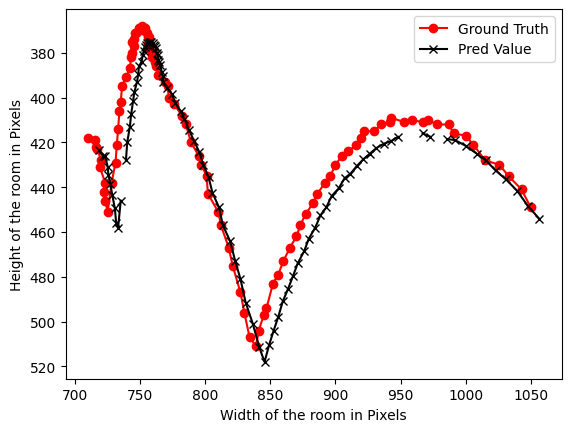

In [44]:
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x3, y3, marker='x', color='black', label='Pred Value')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [6]:
df_june19 = pd.read_csv('Img2100Dynamics.csv')
df_june19

,x,y
0,718.0,422.0000
1,721.0,426.0000
2,724.0,430.0109
3,724.0,430.0000
4,725.0,434.0000
...,...,...
95,1023.0,432.0000
96,1030.0,436.0000
97,1038.0,442.0000
98,1047.0,447.0000


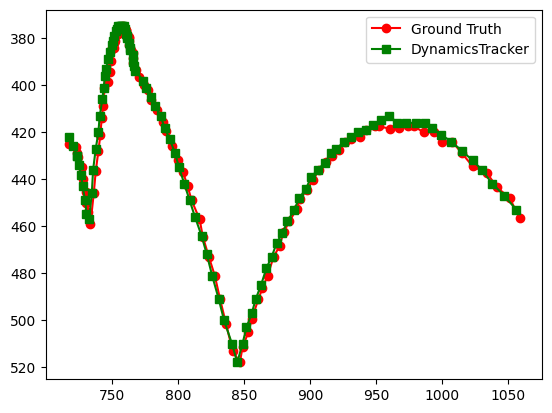

In [9]:
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
# plt.plot(x3, y3, marker='x', color='black', label='Pred Value')
plt.plot(e, f, marker='s', color='green', label='DynamicsTracker')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
# plt.xlabel('Width of the room in Pixels')
# plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [8]:
e = df_june19['x']
f= df_june19['y']
count = 0
for i in range(len(x1)):
    predicted_coordinates3 = list(zip(e,f))
    ground_coordinates = list(zip(x1,y1))
    count += 1
    
errorE = avg_displacement_error(predicted_coordinates3, ground_coordinates)
errorF = avg_mahalanobis_distance(predicted_coordinates3, ground_coordinates)
print(errorE, errorF)

NameError: name 'avg_displacement_error' is not defined

Yolov7

In [ ]:
df_new3 = pd.read_csv('NewYolov7.csv', sep=',', delimiter=None)
df_new3

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,ball,718,426,13,13,left002004.png,1280,720
1,ball,719,429,14,15,left002005.png,1280,720
2,ball,722,433,14,15,left002006.png,1280,720
3,ball,724,438,13,14,left002007.png,1280,720
4,ball,730,440,14,14,left002011.png,1280,720
...,...,...,...,...,...,...,...,...
100,ball,1008,422,16,14,left002095.png,1280,720
101,ball,1014,425,18,17,left002096.png,1280,720
102,ball,1023,429,18,17,left002097.png,1280,720
103,ball,1031,435,18,16,left002098.png,1280,720


In [ ]:
x4 = df_new3['bbox_x']
y4 = df_new3['bbox_y']

count = 0
for i in range(len(x1)):
    predicted_coordinates3 = list(zip(x4[:100],y4[:100]))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [ ]:
error3 = avg_displacement_error(predicted_coordinates3, ground_coordinates)
print(error3)

44.389438191394746


In [ ]:
error4 = avg_mahalanobis_distance(predicted_coordinates3, ground_coordinates)
print(error4)

1.20741465653928


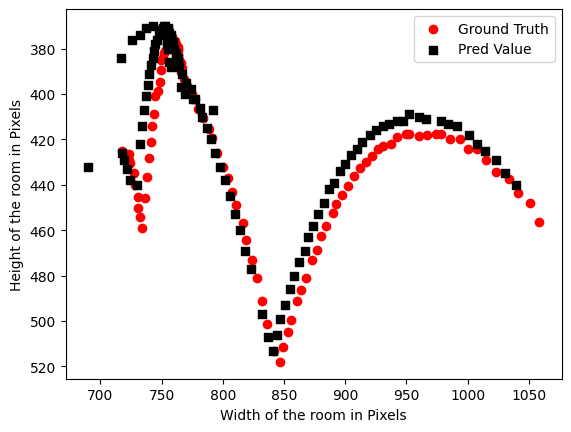

In [ ]:
from matplotlib import markers
plt.scatter(x1, y1, marker='o', color='red', label='Ground Truth')
plt.scatter(x4, y4, marker='s', color='black', label='Pred Value')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

Yolov8 Tracking Strong Sort and DeepOCsort

In [ ]:
df5 = pd.read_csv('TestVid2_deepocsort.csv', sep=',', delimiter=None)
df5['center_x'] = df5['x'] + df5['w'] / 2
df5['center_y'] = df5['y'] + df5['h'] / 2
df5

,num,x,y,h,w,center_x,center_y
0,0,718,426,13,11,723.5,432.5
1,1,719,429,14,14,726.0,436.0
2,2,720,432,15,14,727.0,439.5
3,3,722,438,14,13,728.5,445.0
4,4,723,442,16,15,730.5,450.0
...,...,...,...,...,...,...,...
90,90,1015,425,16,16,1023.0,433.0
91,91,1024,430,14,15,1031.5,437.0
92,92,1031,435,16,16,1039.0,443.0
93,93,1040,440,16,16,1048.0,448.0


In [ ]:
x5 = df5['center_x']
y5 = df5['center_y']

count = 0
for i in range(len(x1)):
    predicted_coordinates5 = list(zip(x5,y5))
    ground_coordinates = list(zip(x1,y1))
    count += 1
    
error5 = avg_displacement_error(predicted_coordinates5, ground_coordinates)
print(error5)

22.97034618923641


In [ ]:
error6 = avg_mahalanobis_distance(predicted_coordinates5, ground_coordinates)
error6

0.6917372773577356

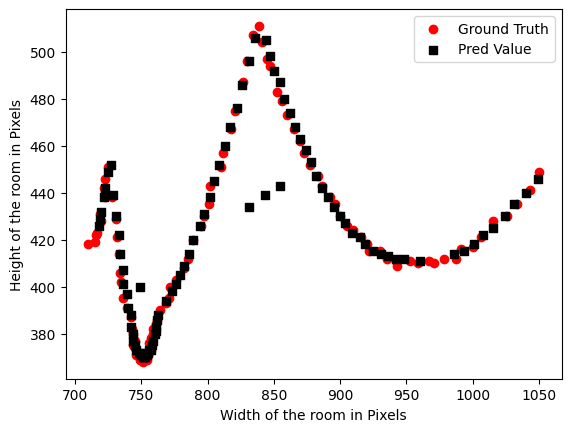

In [ ]:
from matplotlib import markers
plt.scatter(x1, y1, marker='o', color='red', label='Ground Truth')
plt.scatter(x5, y5, marker='s', color='black', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [ ]:
df6 = pd.read_csv('TestVid2_strongsort.csv', sep=',', delimiter=None)
df6['center_x'] = df6['x'] + df6['w'] / 2
df6['center_y'] = df6['y'] + df6['h'] / 2
df6

,x,y,h,w,center_x,center_y
0,744,377,13,13,750.5,383.5
1,744,374,14,14,751.0,381.0
2,745,372,14,14,752.0,379.0
3,747,371,13,14,754.0,377.5
4,748,371,14,13,754.5,378.0
...,...,...,...,...,...,...
59,1015,425,15,15,1022.5,432.5
60,1023,429,15,16,1031.0,436.5
61,1031,435,15,15,1038.5,442.5
62,1039,439,17,17,1047.5,447.5


In [ ]:
x6 = df6['center_x']
y6 = df6['center_y']

count = 0
for i in range(len(x1)):
    predicted_coordinates6 = list(zip(x6,y6))
    ground_coordinates = list(zip(x1,y1))
    count += 1
    
error7 = avg_displacement_error(predicted_coordinates6, ground_coordinates)
print(error7)

99.82819987568884


In [ ]:
error8 = avg_mahalanobis_distance(predicted_coordinates6, ground_coordinates)
error8

2.8596286304188987

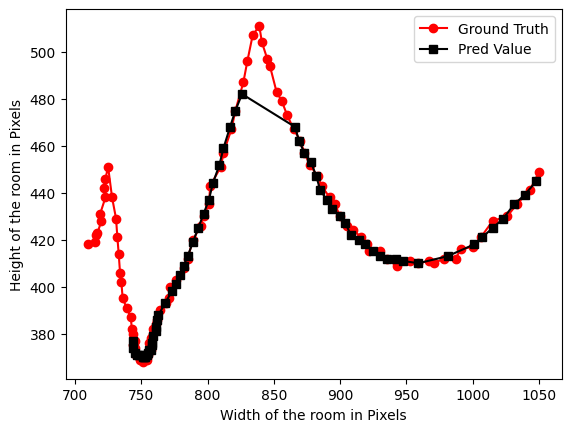

In [ ]:
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x6, y6, marker='s', color='black', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [ ]:
#Matlab Code based detection
df7 = pd.read_csv('ball_positionMay18.csv', sep=',', delimiter=None)
df7

,Filename,X,Y
0,left002000.png,1216.590,640.1717
1,left002001.png,1217.112,639.1717
2,left002002.png,1182.112,634.1717
3,left002003.png,1217.878,639.2045
4,left002004.png,1258.846,670.9414
...,...,...,...
95,left002096.png,1257.934,653.1310
96,left002097.png,1217.080,639.4810
97,left002098.png,1182.712,621.6172
98,left002099.png,1216.712,638.1203


In [ ]:
x7 = df7[' X ']
y7 = df7['Y ']
count = 0
for i in range(len(x1)):
    predicted_coordinates7 = list(zip(x7,y7))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [ ]:
error9 = avg_displacement_error(predicted_coordinates7, ground_coordinates)
print(error9)

453.7825896768731


In [ ]:
error10 = avg_mahalanobis_distance(predicted_coordinates7, ground_coordinates)
error10

21.209157444470076

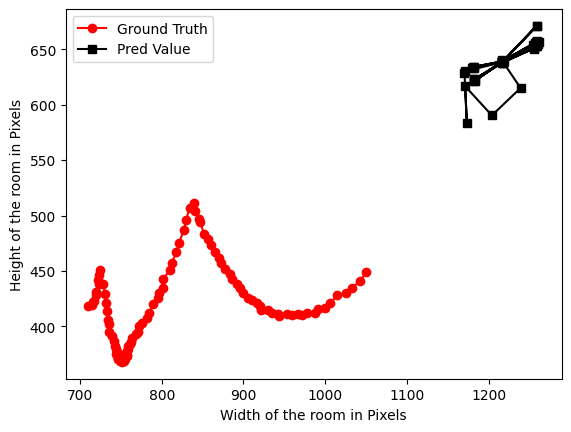

In [ ]:
#plot df7 with ground truth
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x7, y7, marker='s', color='black', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [ ]:
df8 = pd.read_csv('ball_positionMay19.csv', sep=',', delimiter=None)
df8

,Filename,X,Y
0,left002013.png,614.9888,310.9888
1,left002014.png,1217.1160,640.0326
2,left002015.png,1182.1400,633.1618
3,left002016.png,1217.6800,638.7149
4,left002017.png,1255.0320,650.5364
...,...,...,...
83,left002096.png,1257.8640,653.1398
84,left002097.png,1217.0100,639.4898
85,left002098.png,1182.6420,621.6260
86,left002099.png,1216.6420,638.1291


In [ ]:
x8 = df8[' X ']
y8 = df8['Y ']

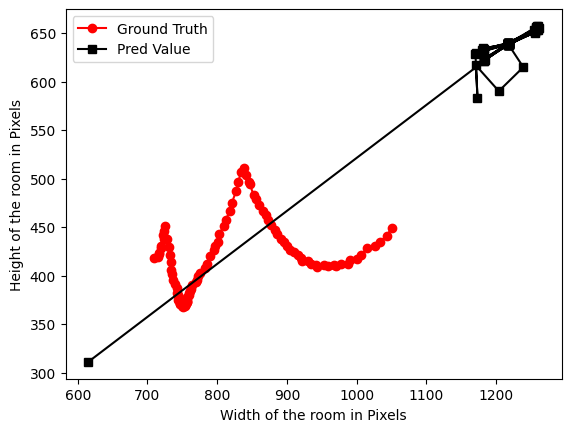

In [ ]:
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x8, y8, marker='s', color='black', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [ ]:
df9 = pd.read_csv('ball_position1.csv', sep=',', delimiter=None)
df9

,Filename,X,Y
0,left002013.png,684.2086,443.2080
1,left002014.png,718.3962,436.7180
2,left002015.png,697.5818,429.4624
3,left002016.png,692.0303,424.4003
4,left002017.png,686.8663,418.1454
...,...,...,...
83,left002096.png,788.3943,450.9502
84,left002097.png,791.8370,446.2584
85,left002098.png,805.4787,472.4194
86,left002099.png,803.3620,455.4702


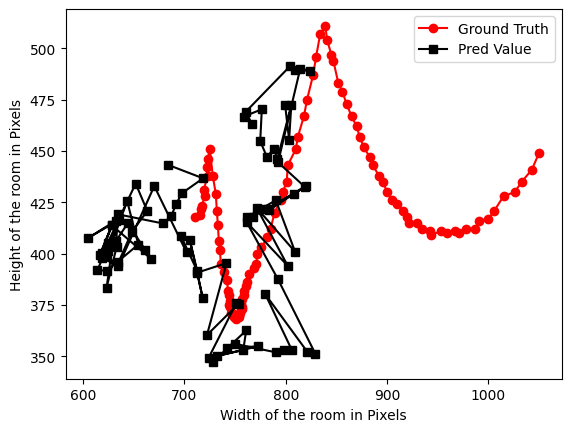

In [ ]:
#plot df9 with ground truth
x9 = df9[' X ']
y9 = df9['Y ']
from matplotlib import markers
plt.plot(x1, y1, marker='o', color='red', label='Ground Truth')
plt.plot(x9, y9, marker='s', color='black', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()